---
# 레저용품 EDA
---

## 0. 데이터 로드 & 전처리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline

In [2]:
offline = pd.read_csv("data/02_카드매출데이터(신한카드)/CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT_KOR.csv")
online  = pd.read_excel("data/05_물류데이터(CJ올리브네트웍스)/2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx")

In [3]:
# 요일 계산
weekdays = ['월', '화', '수', '목', '금', '토', '일']
offline['WEEKDAY'] = offline['STD_DD'].apply(lambda x:datetime.strptime(str(x), '%Y%m%d').weekday())
offline['WEEKDAY'] = offline['WEEKDAY'].apply(lambda x:str(x)+"_"+weekdays[x])
online['WEEKDAY']  = online['DL_YMD'].apply(lambda x:datetime.strptime(str(x), '%y%m%d').weekday())
online['WEEKDAY']  = online['WEEKDAY'].apply(lambda x:str(x)+"_"+weekdays[x])

In [4]:
# 년, 월, 년+월 추출
online['YEAR']  = online['DL_YMD'].apply(lambda x:x//10000+2000)
online['MONTH'] = online['DL_YMD'].apply(lambda x:(x//100)%100)
online['YEAR_MONTH'] = online['YEAR']*100 + online['MONTH']

In [5]:
# 주차 계산
offline['WEEK_NUM'] = offline['STD_DD'].apply(lambda x:datetime.strptime(str(x), '%Y%m%d').isocalendar()[1])
online['WEEK_NUM']  = online['DL_YMD'].apply(lambda x:datetime.strptime(str(x), '%y%m%d').isocalendar()[1])

In [6]:
offline.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,AVG_AMT,YEAR,MONTH,DAY,YEAR_MONTH,WEEKDAY,WEEK_NUM
0,20190201,대구 중구,동인동,숙박,F,25,11,595,54.090909,2019,2,1,201902,4_금,5
1,20190201,대구 중구,동인동,숙박,F,50,5,243,48.600000,2019,2,1,201902,4_금,5
2,20190201,대구 중구,동인동,숙박,F,55,5,27,5.400000,2019,2,1,201902,4_금,5
3,20190201,대구 중구,동인동,숙박,M,20,11,243,22.090909,2019,2,1,201902,4_금,5
4,20190201,대구 중구,동인동,숙박,M,25,11,433,39.363636,2019,2,1,201902,4_금,5


In [7]:
online.head()

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT,WEEKDAY,YEAR,MONTH,YEAR_MONTH,WEEK_NUM
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,4_금,2019,2,201902,5
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,4_금,2019,2,201902,5
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1,4_금,2019,2,201902,5
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6,4_금,2019,2,201902,5
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21,4_금,2019,2,201902,5


In [8]:
print(set(offline['MCT_CAT_CD']))
print("="*120)
print(set(online['DL_GD_LCLS_NM']))

{'음료식품', '의료기관', '보건위생', '의복', '서적문구', '요식업소', '전기', '문화취미', '유통업', '광학제품', '레저업소', '레저용품', '가구', '직물', '수리서비스', '가전', '자동차판매', '사무통신', '신변잡화', '주방용구', '연료판매', '자동차 정비', '숙박'}
{'도서/음반', '패션의류', '스포츠/레저', '출산/육아', '식품', '생활건강', '패션잡화', '디지털/가전', '화장품/미용', '가구/인테리어'}


## 1. 전년 동월 대비 비교

In [9]:
def graph_by_year_month_offline(category_name):
    category_df = offline.loc[offline['MCT_CAT_CD']==category_name, :]
    category_df = category_df.groupby(['YEAR', 'MONTH'])[['USE_AMT', 'USE_CNT']].sum().reset_index()
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
    sns.barplot(x=category_df['MONTH'], y=category_df['USE_CNT'], hue='YEAR', data=category_df, ax=axes[0])
    sns.barplot(x=category_df['MONTH'], y=category_df['USE_AMT'], hue='YEAR', data=category_df, ax=axes[1])
    axes[0].set_title(category_name + "의 월별 소비횟수")
    axes[1].set_title(category_name + "의 월별 소비금액")

In [10]:
def graph_by_year_month_online(category_name):
    plt.figure(figsize=(8, 5)) 
    category_df = online.groupby(['DL_GD_LCLS_NM', 'YEAR', 'MONTH'])[['INVC_CONT']].sum().reset_index()
    category_df = category_df.query('DL_GD_LCLS_NM=="{}"'.format(category_name))

    sns.barplot(x='MONTH',   y='INVC_CONT', hue='YEAR', data=category_df)
    plt.title(category_name + " 송장건수")

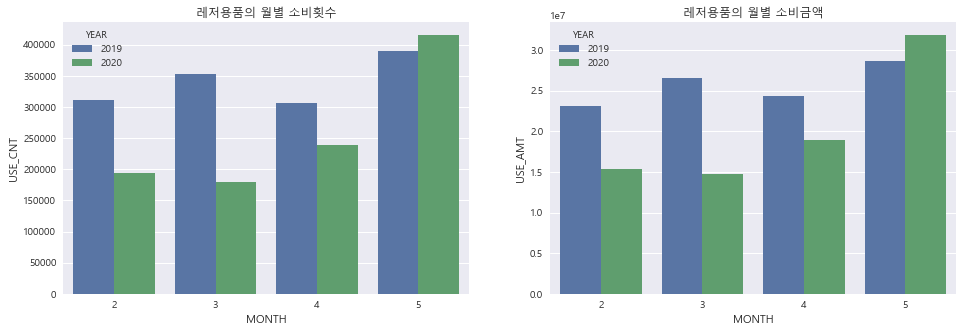

In [11]:
graph_by_year_month_offline("레저용품")

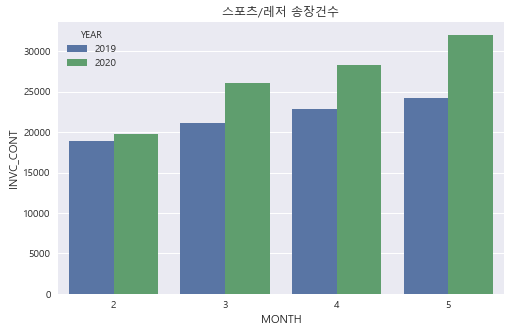

In [12]:
graph_by_year_month_online("스포츠/레저")

---
## 2. 오프라인 (카드)

In [27]:
def graph_by_year_month(category_name, age_or_sex):
    ageOrSex = 'AGE_CD' if age_or_sex=='age' else 'SEX_CD'
    category_df = offline.loc[offline['MCT_CAT_CD']==category_name, :]
    category_df = category_df.groupby(['YEAR_MONTH', ageOrSex])[['USE_CNT', 'USE_AMT']].sum().reset_index()
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))
    sns.barplot(x='YEAR_MONTH', y='USE_CNT', hue=ageOrSex, data=category_df, ax=axes[0])
    sns.barplot(x='YEAR_MONTH', y='USE_AMT', hue=ageOrSex, data=category_df, ax=axes[1])
    axes[0].set_title(category_name + "의 {}별 소비횟수".format(ageOrSex))
    axes[1].set_title(category_name + "의 {}별 소비금액".format(ageOrSex))
    axes[0].legend(loc='lower right')
    axes[1].legend(loc='lower right')
    axes[0].axvline(x=3.5, color='r', linewidth=2, linestyle='--')
    axes[1].axvline(x=3.5, color='r', linewidth=2, linestyle='--')
    
    
def graph_by_month_number(category_name, age_or_sex):
    ageOrSex = 'AGE_CD' if age_or_sex=='age' else 'SEX_CD'
    category_df = offline.loc[offline['MCT_CAT_CD']==category_name, :]
    category_df = category_df.groupby(['WEEK_NUM', ageOrSex])[['USE_CNT', 'USE_AMT']].sum().reset_index()
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))
    sns.barplot(x='WEEK_NUM', y='USE_CNT', hue=ageOrSex, data=category_df, ax=axes[0])
    sns.barplot(x='WEEK_NUM', y='USE_AMT', hue=ageOrSex, data=category_df, ax=axes[1])
    axes[0].set_title(category_name + "의 {}별 소비횟수".format(ageOrSex))
    axes[1].set_title(category_name + "의 {}별 소비금액".format(ageOrSex))
    axes[0].legend(loc='lower right')
    axes[1].legend(loc='lower right')
    axes[0].axvline(x=3.5, color='r', linewidth=2, linestyle='--')
    axes[1].axvline(x=3.5, color='r', linewidth=2, linestyle='--')
    

def graph_by_weekday(category_name, age_or_sex):
    ageOrSex = 'AGE_CD' if age_or_sex=='age' else 'SEX_CD'
    category_df = offline.loc[offline['MCT_CAT_CD']==category_name, :]
    category_df = category_df.groupby(['YEAR', ageOrSex, 'WEEKDAY'])[['USE_CNT', 'USE_AMT']].sum().reset_index()
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
    df_2019 = category_df.query('YEAR==2019')
    df_2020 = category_df.query('YEAR==2020')

    sns.barplot(x=ageOrSex, y='USE_CNT', hue='WEEKDAY', data=df_2019, ax=axes[0][0])
    sns.barplot(x=ageOrSex, y='USE_CNT', hue='WEEKDAY', data=df_2020, ax=axes[0][1])
    sns.barplot(x=ageOrSex, y='USE_AMT', hue='WEEKDAY', data=df_2019, ax=axes[1][0])
    sns.barplot(x=ageOrSex, y='USE_AMT', hue='WEEKDAY', data=df_2020, ax=axes[1][1])
    
    axes[0][0].set_ylim([0, df_2019['USE_CNT'].max()*1.1])
    axes[0][1].set_ylim([0, df_2019['USE_CNT'].max()*1.1])
    axes[1][0].set_ylim([0, df_2019['USE_AMT'].max()*1.1])
    axes[1][1].set_ylim([0, df_2019['USE_AMT'].max()*1.1])

    axes[0][0].set_title("2019년 요일별 USE_CNT")
    axes[0][1].set_title("2020년 요일별 USE_CNT")
    axes[1][0].set_title("2019년 요일별 USE_AMT")
    axes[1][1].set_title("2020년 요일별 USE_AMT")
    
    
def graph_by_same_month_ratio(category_name, age_or_sex):
    ageOrSex = 'AGE_CD' if age_or_sex=='age' else 'SEX_CD'
    category_df = offline.loc[offline['MCT_CAT_CD']==category_name, :]
    category_df = category_df.groupby(['DONG_CD', 'YEAR_MONTH', ageOrSex])[['USE_CNT', 'USE_AMT']].sum().reset_index()

    result_df = pd.DataFrame()
    DONGs = category_df['DONG_CD'].unique()
    LISTs  = category_df[ageOrSex].unique()

    for dong in DONGs:
        dong_temp = category_df.loc[category_df['DONG_CD']==dong, :]
        for select in LISTs:
            temp = dong_temp.loc[dong_temp[ageOrSex]==select, :]
            for year_month in [201902, 201903, 201904, 201905]:
                try:
                    year_2019_cnt, year_2019_amt = temp.loc[temp['YEAR_MONTH']==year_month, ['USE_CNT', 'USE_AMT']].values[0]
                    year_2020_cnt, year_2020_amt = temp.loc[temp['YEAR_MONTH']==year_month+100, ['USE_CNT', 'USE_AMT']].values[0]
                    result_df = result_df.append({   "dong":dong,
                                                     age_or_sex:select,
                                                     "month":round(year_month-201900, 0),
                                                     "cnt_ratio":year_2020_cnt/year_2019_cnt,
                                                     "amt_ratio":year_2020_amt/year_2019_amt}, ignore_index=True)
                except:
                    continue
                    #print(dong, age, year_month)
                    
    display(result_df[['cnt_ratio', 'amt_ratio']].describe())
    result_median_df = result_df.groupby(['month', age_or_sex])[['amt_ratio', 'cnt_ratio']].median().reset_index() # 극단치 때문에 median 사용
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
    sns.boxplot(result_df['cnt_ratio'], ax=axes[0][0])
    sns.boxplot(result_df['amt_ratio'], ax=axes[0][1])
    sns.barplot(x='month', y='cnt_ratio', hue=age_or_sex, data=result_median_df, ax=axes[1][0])
    sns.barplot(x='month', y='amt_ratio', hue=age_or_sex, data=result_median_df, ax=axes[1][1])    

    axes[0][0].set_title("cnt_ratio BOXPLOT"); axes[0][1].set_title("amt_ratio BOXPLOT")
    axes[1][0].legend(loc='lower right'); axes[1][1].legend(loc='lower right')
    axes[1][0].axhline(y=1, color='r', linewidth=2, linestyle='--'); axes[1][1].axhline(y=1, color='r', linewidth=2, linestyle='--')
    axes[1][0].set_title("2019년 대비 2020년 동월의 cnt 비율의 median")
    axes[1][1].set_title("2019년 대비 2020년 동월의 amt 비율의 median")
    
    
def graph_by_increase_rate(category_name, age_or_sex):
    ageOrSex = 'AGE_CD' if age_or_sex=='age' else 'SEX_CD'
    category_df = offline.loc[offline['MCT_CAT_CD']==category_name, :]
    category_df = category_df.groupby(['DONG_CD', 'YEAR_MONTH', ageOrSex])[['USE_CNT', 'USE_AMT']].sum().reset_index()

    result_df = pd.DataFrame()
    DONGs = category_df['DONG_CD'].unique()
    LISTs  = category_df[ageOrSex].unique()

    for dong in DONGs:
        dong_temp = category_df.loc[category_df['DONG_CD']==dong, :]
        for select in LISTs:
            temp = dong_temp.loc[dong_temp[ageOrSex]==select, :]
            try:
                year_2019 = temp.loc[temp['YEAR_MONTH']<202000, ['USE_CNT', 'USE_AMT']]
                year_2019_cnt = ((year_2019['USE_CNT'] - year_2019['USE_CNT'].shift(1)).dropna() / year_2019['USE_CNT'].shift(1).dropna()).values
                year_2019_amt = ((year_2019['USE_AMT'] - year_2019['USE_AMT'].shift(1)).dropna() / year_2019['USE_AMT'].shift(1).dropna()).values

                year_2020 = temp.loc[temp['YEAR_MONTH']>202000, ['USE_CNT', 'USE_AMT']]
                year_2020_cnt = ((year_2020['USE_CNT'] - year_2020['USE_CNT'].shift(1)).dropna() / year_2020['USE_CNT'].shift(1).dropna()).values
                year_2020_amt = ((year_2020['USE_AMT'] - year_2020['USE_AMT'].shift(1)).dropna() / year_2020['USE_AMT'].shift(1).dropna()).values

                for i, month in enumerate(['month_2_3', 'month_3_4', 'month_4_5']):
                    result_df = result_df.append({"year":2019,
                                                  "month":month,
                                                  "dong":dong,
                                                  age_or_sex:select,
                                                  "cnt_ratio":year_2019_cnt[i],
                                                  "amt_ratio":year_2019_amt[i]}, ignore_index=True)
                    result_df = result_df.append({"year":2020,
                                                  "month":month,
                                                  "dong":dong,
                                                  age_or_sex:select,
                                                  "cnt_ratio":year_2020_cnt[i],
                                                  "amt_ratio":year_2020_amt[i]}, ignore_index=True)
            except:
                continue
                #print(dong, age, year_month)
                
    result_df = result_df[['year', 'month', 'dong', age_or_sex, 'cnt_ratio', 'amt_ratio']]
    result_df['year'] = result_df['year'].map(int)
    temp = result_df.groupby(['year', 'month', age_or_sex])[['cnt_ratio', 'amt_ratio']].median().reset_index()

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
    year_2019 = temp.query('year==2019')
    year_2020 = temp.query('year==2020')
    sns.lineplot(x='month', y='cnt_ratio', hue=age_or_sex, data=year_2019, ax=axes[0][0])
    sns.lineplot(x='month', y='cnt_ratio', hue=age_or_sex, data=year_2020, ax=axes[0][1])
    sns.lineplot(x='month', y='amt_ratio', hue=age_or_sex, data=year_2019, ax=axes[1][0])
    sns.lineplot(x='month', y='amt_ratio', hue=age_or_sex, data=year_2020, ax=axes[1][1])

    for row in [0, 1]:
        name = "cnt_ratio" if row == 0 else "amt_ratio"
        axes[row][0].set_title("2019년 " + name + " (전 월 대비 증가율)의 중위수")
        axes[row][1].set_title("2020년 " + name + " (전 월 대비 증가율)의 중위수")
        for col in [0, 1]:
            axes[row][col].axhline(y=0, color='r', linewidth=2, linestyle='--')
            axes[row][col].set_ylim([temp[name].min()-0.1, temp[name].max()+0.1])
            if age_or_sex == "age":
                axes[row][col].legend([20, 25, 30, 35, 40, 45, 50, 55, 60, 65], loc='upper left')
            else:
                axes[row][col].legend(['M', 'F'], loc='upper left')

### 1)연령별

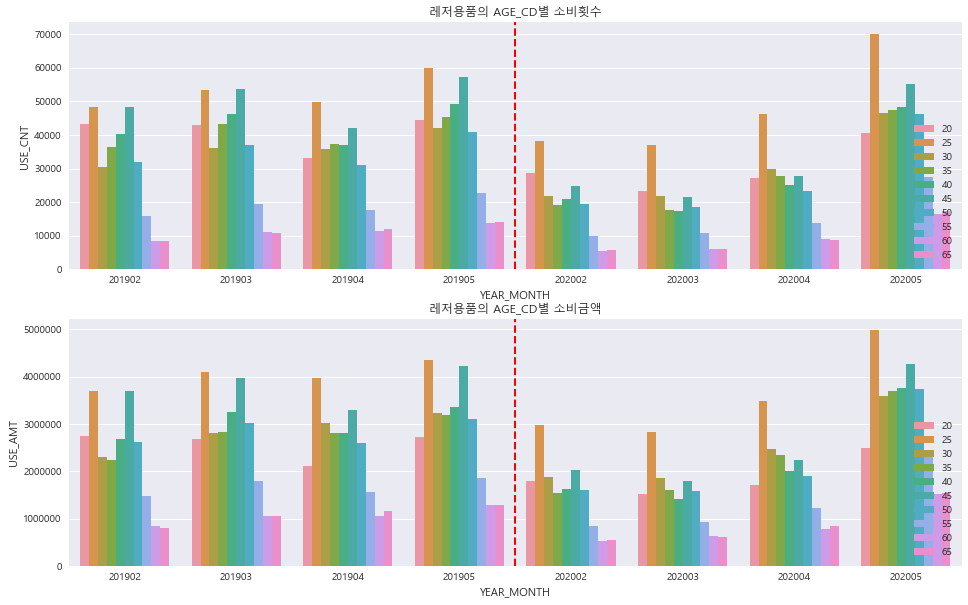

In [28]:
graph_by_year_month("레저용품", 'age')
# 25~29세의 소비횟수/금액이 가장 많다
# 그 다음이 45~49세의 소비횟수/금액
# 60세 이상의 소비횟수/소비금액 최하

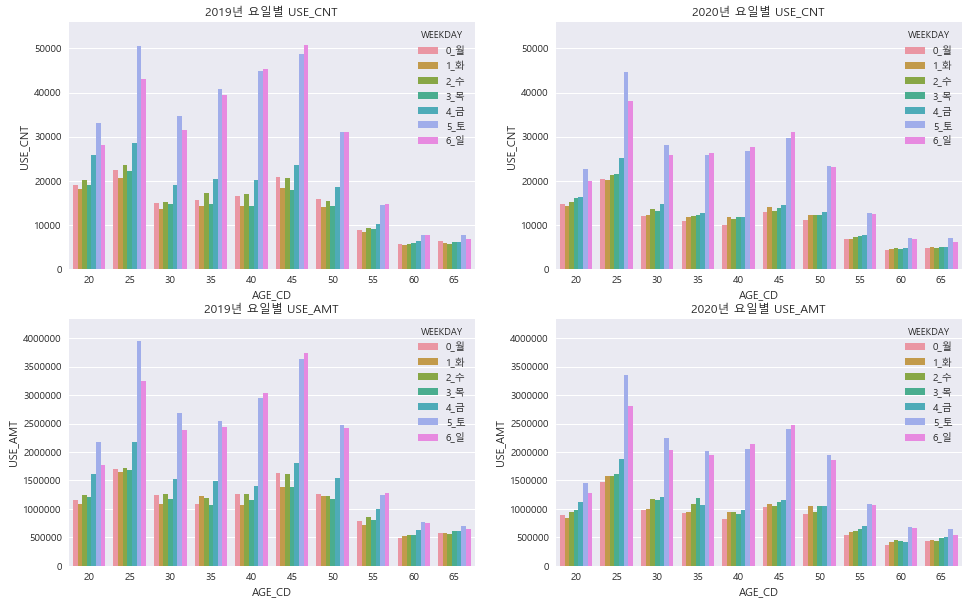

In [29]:
graph_by_weekday("레저용품", 'age')

# 20~60세까지는 평일 대비 주말에 레저용품 구매건수/구매금액이 월등히 높다
# 60세 이상의 경우 평일과 주발이 크게 차이나지 않는다.

,cnt_ratio,amt_ratio
count,1889.000000,1889.000000
mean,0.983002,2.032301
std,2.302560,6.943434
min,0.017606,0.001363
25%,0.394231,0.341970
50%,0.648362,0.672269
75%,1.022472,1.348194
max,84.000000,136.735931


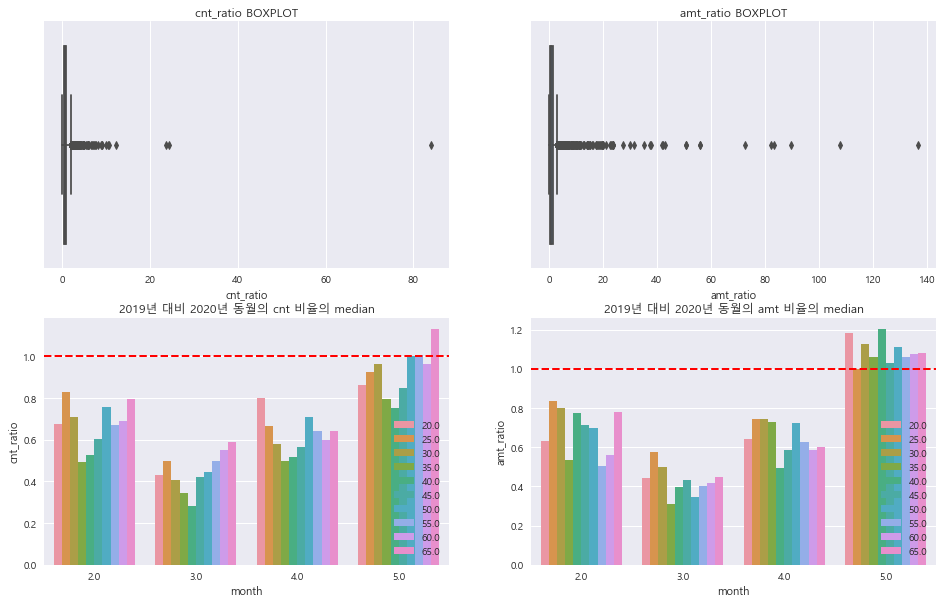

In [30]:
graph_by_same_month_ratio("레저용품", 'age')

# 전년 동월 CNT 대비 올해 동월 CNT가 84인 경우 존재 -> 극단치
# 전년 동월 AMT 대비 올해 동월 AMT가 136인 경우 존재 -> 극단치
# -> 중위수를 찍어보았다
# 5월의 경우 전년 동월 대비 올해 AMT가 모두 1이상 !

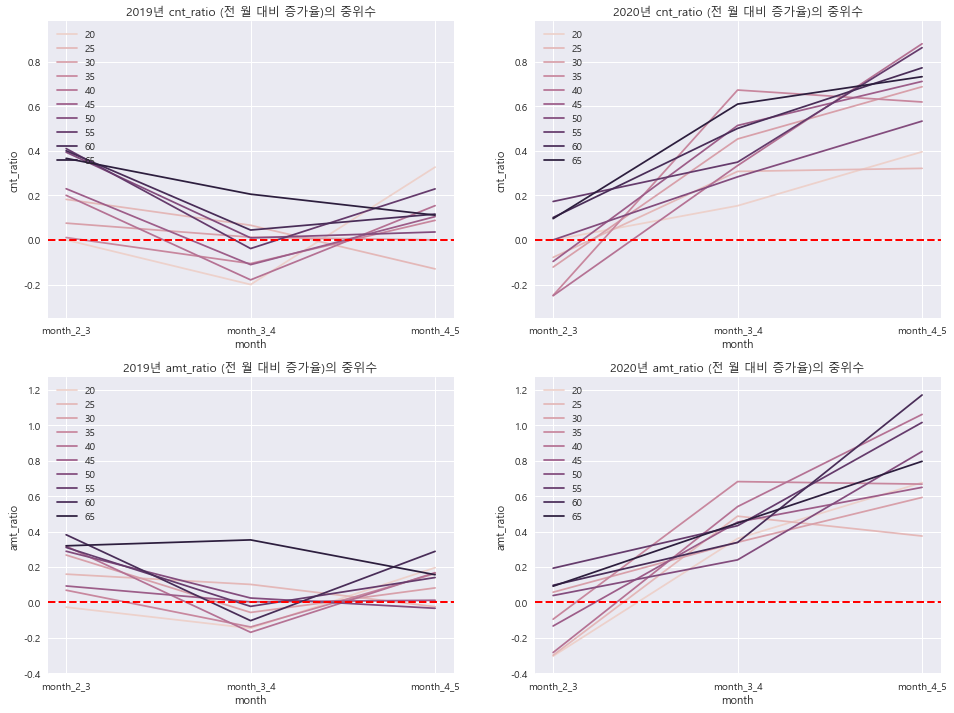

In [31]:
graph_by_increase_rate("레저용품", "age")

# 2019년에는 2월 대비 3월 증가하다가 3월 대비 4월은 감소, 4월 대비 5월은 다시 증가하는 경향을 보임
# 2020년에는 3월 대비 4월에 cnt 증가 / 4월 대비 5월에도 cnt 증가 (증가속도 빨라짐)
# 2020년에는 3월 대비 4월에 amt 증가 / 4월 대비 5월에도 amt 증가 (증가속도 빨라짐)

### 2) 성별

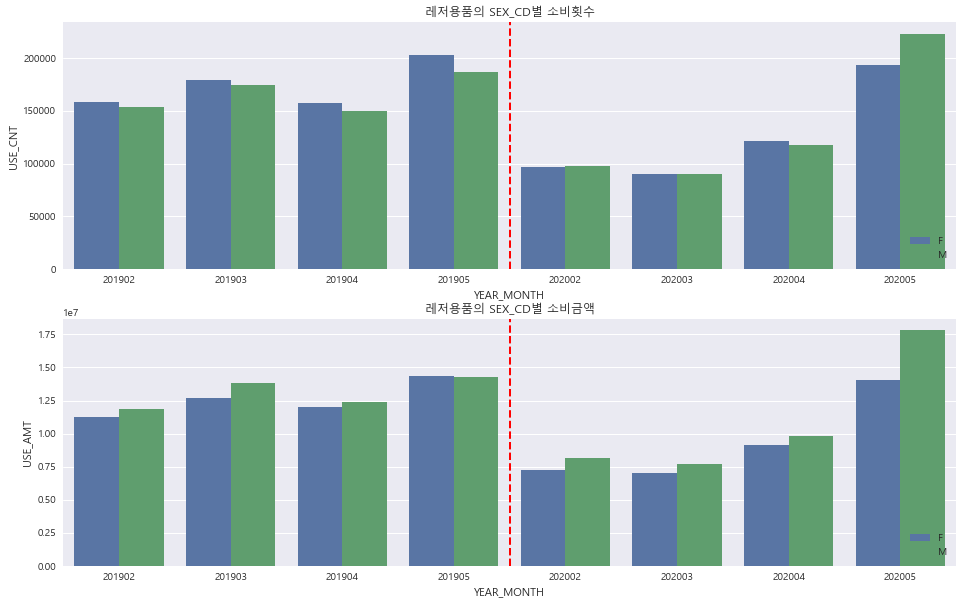

In [32]:
graph_by_year_month("레저용품", "sex")

# 2019년에는 여성이 남성보다 소비횟수 높다. 2020년에도 지속되지만 2020년 5월에는 남성의 소비횟수가 여성 추월
# 2019년에는 남성이 여성보다 소비금액 높다. 2020년에도 이러한 경향이 지속

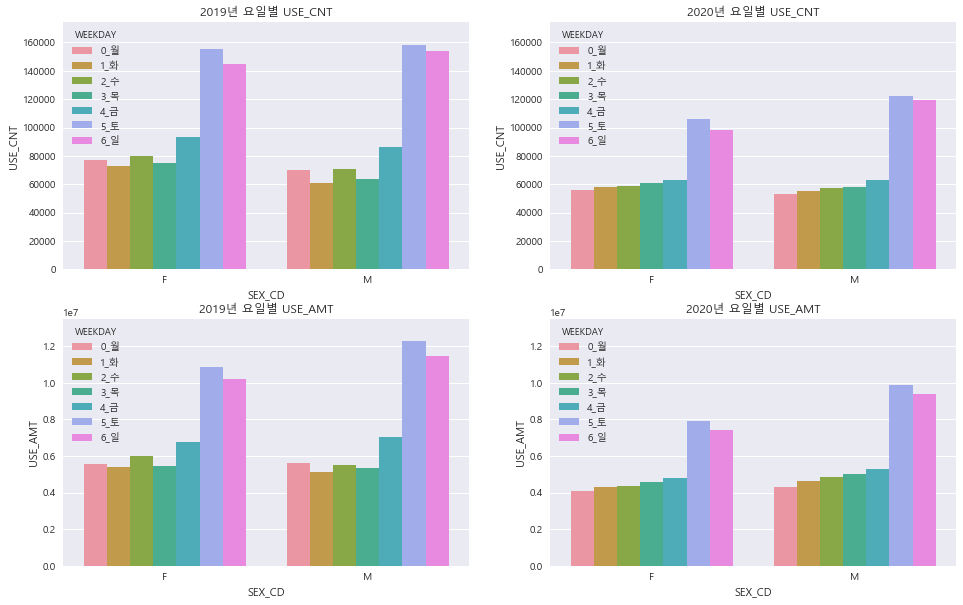

In [33]:
graph_by_weekday("레저용품", "sex")

# 남성/여성 모두 평일 대비 주말에 레저용품 구매횟수/구매건수 높다

,cnt_ratio,amt_ratio
count,494.000000,494.000000
mean,0.911061,1.589674
std,1.235534,5.715312
min,0.014368,0.025399
25%,0.386138,0.425218
50%,0.619714,0.680637
75%,1.000000,1.234618
max,13.333333,111.000000


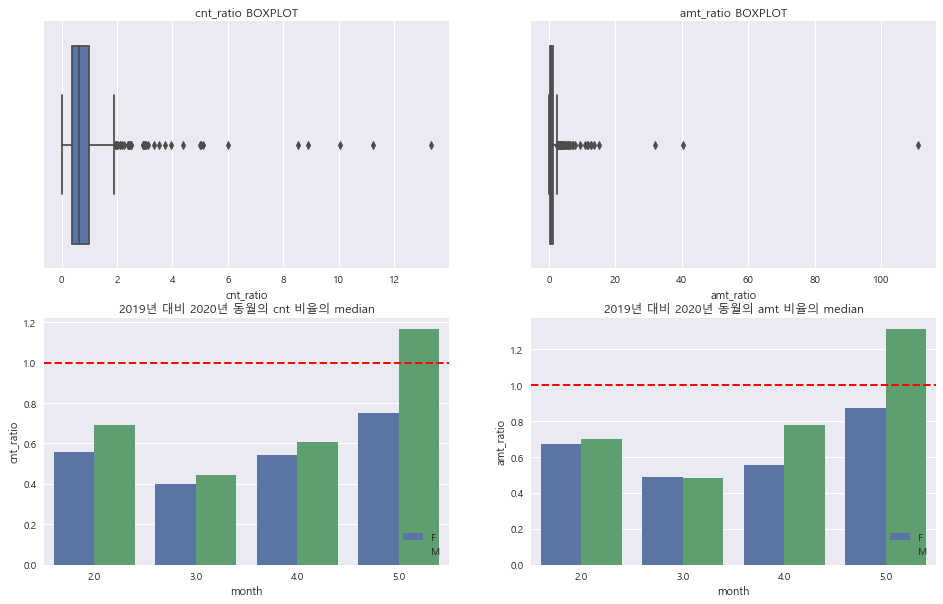

In [34]:
graph_by_same_month_ratio("레저용품", "sex")

# 2, 3, 4월은 모두 전년 동월 대비 AMT, CNT가 낮은 수준
# 하지만 5월의 경우 남성은 AMT, CNT가 1이상 (여성은 1미만) -> 5월에 남성에게서 레저용품 구매횟수/구매건수 증가

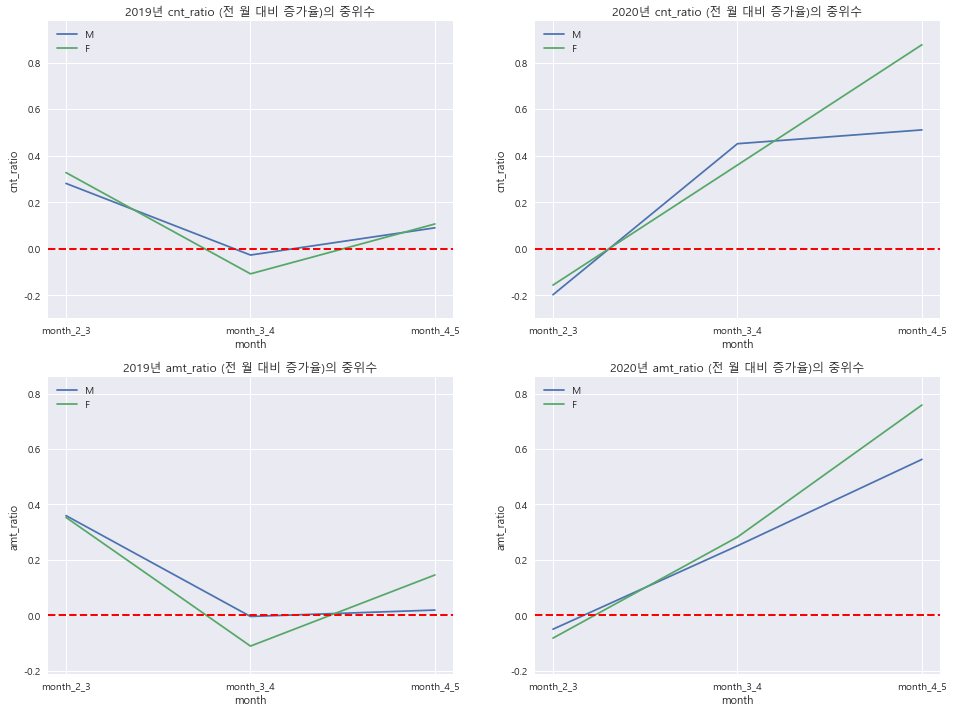

In [35]:
graph_by_increase_rate("레저용품", "sex")

# 2019 : 2월 대비 3월 증가, 3월 대비 4월 감소, 4월 대비 5월 증가
# 2020 : 2월 대비 3월 감소, 3월 대비 4월 증가, 4월 대비 5월 증가

---
## 3. 온라인 (물류)

In [36]:
def graph_by_year_month_weekday_online(category_name):
    
    fig, axes = plt.subplots(ncols=2, figsize=(16, 5))
    
    category_df1 = online.groupby(['DL_GD_LCLS_NM', 'YEAR', 'MONTH'])[['INVC_CONT']].sum().reset_index()
    category_df1 = category_df1.query('DL_GD_LCLS_NM=="{}"'.format(category_name))
    
    category_df2 = online.groupby(['DL_GD_LCLS_NM', 'YEAR', 'WEEKDAY'])[['INVC_CONT']].sum().reset_index()
    category_df2 = category_df2.query('DL_GD_LCLS_NM=="{}"'.format(category_name))

    sns.barplot(x='MONTH',   y='INVC_CONT', hue='YEAR', data=category_df1, ax=axes[0])
    sns.barplot(x='WEEKDAY', y='INVC_CONT', hue='YEAR', data=category_df2, ax=axes[1])
    axes[0].set_title(category_name + " 송장건수")
    axes[1].set_title(category_name + " 송장건수")
    
def graph_by_same_month_ratio_online(category_name):    
    category_df = online.loc[online['DL_GD_LCLS_NM']==category_name, :]
    category_df = category_df.groupby(['HDNG_NM', 'YEAR_MONTH'])[['INVC_CONT']].sum().reset_index()

    result_df = pd.DataFrame()
    DONGs = category_df['HDNG_NM'].unique()

    for dong in DONGs:
        temp = category_df.loc[category_df['HDNG_NM']==dong, :]
        for year_month in [201902, 201903, 201904, 201905]:
            try:
                year_2019 = temp.loc[temp['YEAR_MONTH']==year_month, ['INVC_CONT']].values[0][0]
                year_2020 = temp.loc[temp['YEAR_MONTH']==year_month+100, ['INVC_CONT']].values[0][0]
                result_df = result_df.append({   "dong":dong,
                                                 "month":round(year_month-201900, 0),
                                                 "invc_ratio":year_2020/year_2019}, ignore_index=True)
            except:
                continue
                #print(dong, age, year_month)

    display(result_df[['invc_ratio']].describe())
    result_median_df = result_df.groupby(['month'])[['invc_ratio']].median().reset_index() # 극단치 때문에 median 사용

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
    sns.boxplot(result_df['invc_ratio'], ax=axes[0])
    sns.barplot(x='month', y='invc_ratio', data=result_median_df, ax=axes[1])

    axes[0].set_title("cnt_ratio BOXPLOT")
    axes[1].set_title("2019년 대비 2020년 동월의 송장건수 비율의 median")
    axes[1].axhline(y=1, color='r', linewidth=2, linestyle='--')


def graph_by_increase_rate_online(category_name):
    category_df = online.loc[online['DL_GD_LCLS_NM']==category_name, :]
    category_df = category_df.groupby(['HDNG_NM', 'YEAR_MONTH'])[['INVC_CONT']].sum().reset_index()

    result_df = pd.DataFrame()
    DONGs = category_df['HDNG_NM'].unique()

    for dong in DONGs:
        temp = category_df.loc[category_df['HDNG_NM']==dong, :]
        try:
            year_2019 = temp.loc[temp['YEAR_MONTH']<202000, ['INVC_CONT']]
            year_2019 = ((year_2019['INVC_CONT'] - year_2019['INVC_CONT'].shift(1)).dropna() / year_2019['INVC_CONT'].shift(1).dropna()).values

            year_2020 = temp.loc[temp['YEAR_MONTH']>202000, ['INVC_CONT']]
            year_2020 = ((year_2020['INVC_CONT'] - year_2020['INVC_CONT'].shift(1)).dropna() / year_2020['INVC_CONT'].shift(1).dropna()).values

            for i, month in enumerate(['month_2_3', 'month_3_4', 'month_4_5']):
                result_df = result_df.append({  "year":2019,
                                                "month":month,
                                                "dong":dong,
                                                "invc_ratio":year_2019[i]}, ignore_index=True)

                result_df = result_df.append({  "year":2020,
                                                "month":month,
                                                "dong":dong,
                                                "invc_ratio":year_2020[i]}, ignore_index=True)
        except:
            continue
            #print(dong, age, year_month)

    result_df = result_df[['year', 'month', 'dong','invc_ratio']]
    result_df['year'] = result_df['year'].map(int)
    temp = result_df.groupby(['year', 'month'])[['invc_ratio']].median().reset_index()

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    year_2019 = temp.query('year==2019')
    year_2020 = temp.query('year==2020')
    sns.lineplot(x='month', y='invc_ratio', data=year_2019, ax=axes[0])
    sns.lineplot(x='month', y='invc_ratio', data=year_2020, ax=axes[1])

    axes[0].set_title("2019년 송장건수 (전 월 대비 증가율)의 중위수")
    axes[1].set_title("2020년 송장건수 (전 월 대비 증가율)의 중위수")
    axes[0].axhline(y=0, color='r', linewidth=2, linestyle='--')
    axes[1].axhline(y=0, color='r', linewidth=2, linestyle='--')
    axes[0].set_ylim([temp['invc_ratio'].min()-0.1, temp['invc_ratio'].max()+0.1])
    axes[1].set_ylim([temp['invc_ratio'].min()-0.1, temp['invc_ratio'].max()+0.1])


In [37]:
online_category_name = "스포츠/레저"

,invc_ratio
count,276.000000
mean,1.245173
std,0.226993
min,0.682131
25%,1.050678
50%,1.271551
75%,1.393756
max,1.944134


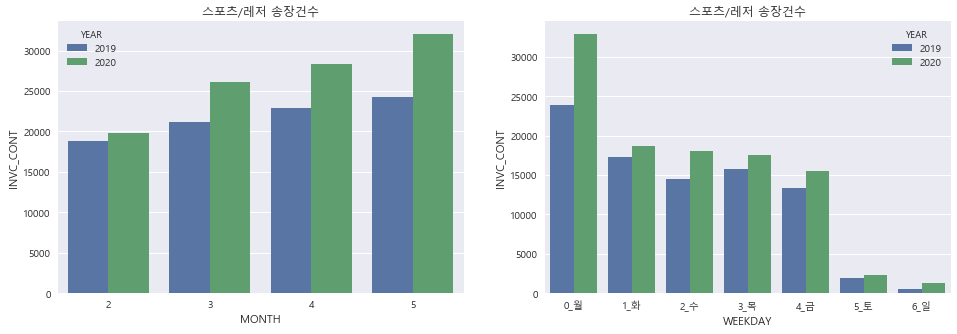

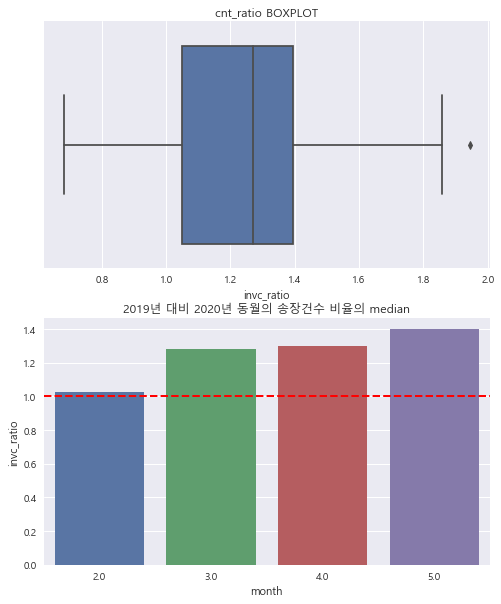

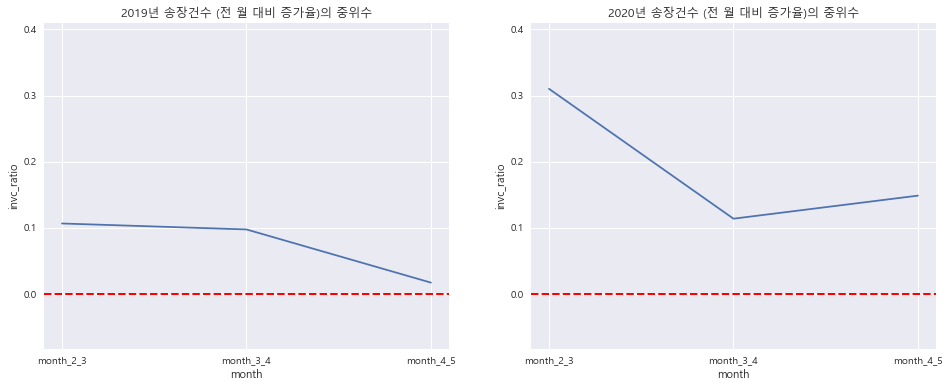

In [38]:
graph_by_year_month_weekday_online(online_category_name)
graph_by_same_month_ratio_online(online_category_name)
graph_by_increase_rate_online(online_category_name)


# 2019년이나 2020년이나 2, 3, 4, 5월 꾸준히 증가하는 추세 (다만, 2020년의 송장건수가 전년 동월 대비 모두 높았다)
# 월요일날 송장건수가 가장 많았다 (아마 주말에 구매하면 송장 등록되는 시점이 월요일이라서 그런 듯!)
# 2019년 대비 2020년 동월의 송장건수 모두 1 이상 (2, 3, 4, 5월)
# 2월 대비 3월 증가율 : 2019년 10% < 2020년 30%
# 3월 대비 4월 증가율 : 10%으로 비슷
# 4월 대비 5월 증가율 : 2019년 2% < 15%

---
## 4. 코로나 신규 확진자수 추이

In [39]:
def graph_corona_time_plot(link):
    corona = pd.read_excel(link)
    corona.fillna(0, inplace=True)
    corona['합'] = corona.drop(['날짜', '검역 누적'], axis=1).sum(axis=1)
    corona['합'] = corona['합'] - corona['합'].shift(1)
    corona['합'].fillna(0, inplace=True)
    corona = corona.set_index("날짜")
    
    max_date = corona.index[corona['합'].argmax()]
    max_date_num_week = max_date.isocalendar()[1]

    ax = corona[['합']].plot(figsize=(16, 6))
    ax.axvline(x=corona['합'].argmax(), color='r', linewidth=2, linestyle='--')
    plt.text(x=corona['합'].argmax(), 
             y=corona['합'].max()*0.9, 
             s='　코로나 신규 확진자수 MAX \n　{} - {}주차'.format(max_date, max_date_num_week), 
             fontsize=14)
    plt.title("코로나 신규확진자수 (한국)", fontsize=14)
    plt.show()

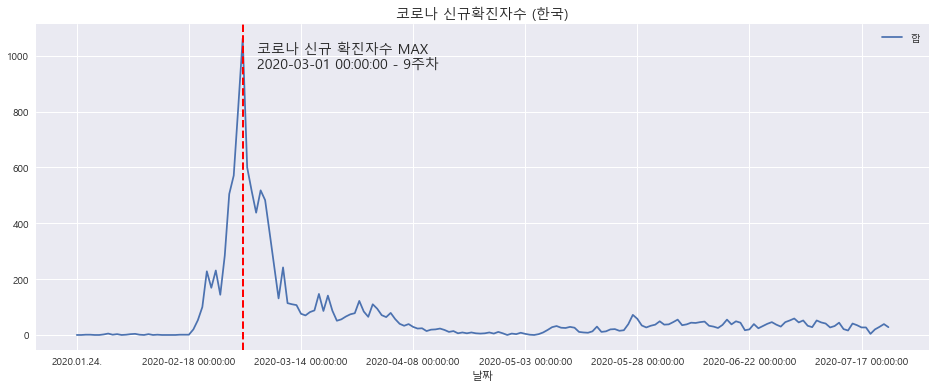

In [40]:
graph_corona_time_plot("data/지역별누적-확진자.xlsx")

---
## 5. 주차별 소비

In [114]:
def graph_by_weeknum(dataframe, category_name, category_column, gu_column, dong_column, aggregate_column):
    # 지역별 주별 평균을 구하고 -> 이것을 업종별로 합해서 그 업종 추이를 보고자 하였다
    week_df = dataframe.groupby([category_column, gu_column, dong_column, 'YEAR', 'WEEK_NUM'])[[aggregate_column]].mean().reset_index()
    week_df = week_df.groupby([category_column, 'YEAR', 'WEEK_NUM'])[[aggregate_column]].sum().reset_index()
    week_df = week_df.loc[week_df[category_column]==category_name, :]
    max_date_num_week = datetime(2020, 3, 1).isocalendar()[1]
    disaster_support_date_num_week = datetime(2020, 5, 13).isocalendar()[1]

    plt.figure(figsize=(16, 5))
    ax = sns.lineplot(x='WEEK_NUM', y=aggregate_column, hue='YEAR', data=week_df, palette="Set2")
    ax.set_xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])
    ax.legend([2019, 2020])
    ax.axvline(x=max_date_num_week, color='r', linewidth=2, linestyle='--')
    ax.axvline(x=disaster_support_date_num_week, color='g', linewidth=2, linestyle='--')
    ax.set_ylim([0, week_df[aggregate_column].max()*1.1])
    ax.text(x=max_date_num_week, 
         y=week_df.query('YEAR==2020')[aggregate_column].min(), 
         s='　코로나 신규 확진자수 최고\n　(2020.03.01)',
         fontsize=12)
    ax.text(x=disaster_support_date_num_week, 
         y=week_df.query('YEAR==2020')[aggregate_column].min(), 
         s='　재난지원금\n　(2020.05.13)',
         fontsize=12)
    ax.set_title("주차별 {} {}".format(category_name, aggregate_column.upper()), fontsize=12)
    
    
def graph_by_weeknum_with_hue_offline(dataframe, category_name, category_column, gu_column, dong_column, aggregate_column, hue_column):
    week_df = dataframe.groupby([category_column, gu_column, dong_column, hue_column, 'YEAR', 'WEEK_NUM'])[[aggregate_column]].mean().reset_index()
    week_df = week_df.groupby([category_column, hue_column, 'YEAR', 'WEEK_NUM'])[[aggregate_column]].sum().reset_index()
    week_df = week_df.loc[week_df[category_column]==category_name, :]
    max_date_num_week = datetime(2020, 3, 1).isocalendar()[1]
    disaster_support_date_num_week = datetime(2020, 5, 13).isocalendar()[1]

    year_2019_df = week_df.loc[week_df['YEAR']==2019, :]
    year_2020_df = week_df.loc[week_df['YEAR']==2020, :]

    max_date_num_week = datetime(2020, 3, 1).isocalendar()[1]
    disaster_support_date_num_week = datetime(2020, 5, 13).isocalendar()[1]
    hue_columns = list(set(week_df[hue_column]))
    hue_columns.sort()
    len_rows = len(set(week_df[hue_column]))

    fig, axes = plt.subplots(ncols=2, figsize=(16, 5))
    sns.lineplot(x='WEEK_NUM', y=aggregate_column, hue=hue_column, data=year_2019_df, palette="Set2", ax=axes[0])
    sns.lineplot(x='WEEK_NUM', y=aggregate_column, hue=hue_column, data=year_2020_df, palette="Set2", ax=axes[1])
    for i in [0, 1]:
        year = 2019 if i==0 else 2020
        axes[i].set_ylim([0, week_df[aggregate_column].max()*1.1])
        axes[i].legend(loc='lower left')
        axes[i].set_xticks(list(set(week_df['WEEK_NUM'])))
        axes[i].axvline(x=max_date_num_week, color='r', linewidth=2, linestyle='--')
        axes[i].axvline(x=disaster_support_date_num_week, color='g', linewidth=2, linestyle='--')
        axes[i].set_title("{}년도".format(year))

    fig, axes = plt.subplots(nrows=len_rows, figsize=(16, 5*len_rows))
    for i, select in enumerate(hue_columns):
        temp_2019 = year_2019_df.loc[year_2019_df[hue_column]==select, :]
        temp_2020 = year_2020_df.loc[year_2020_df[hue_column]==select, :]

        sns.lineplot(x='WEEK_NUM', y=aggregate_column, data=temp_2019, ax=axes[i])
        sns.lineplot(x='WEEK_NUM', y=aggregate_column, data=temp_2020, ax=axes[i])
        axes[i].set_ylim(0, max([temp_2019[aggregate_column].max(), temp_2020[aggregate_column].max()])*1.1)
        axes[i].set_xticks(list(set(week_df['WEEK_NUM'])))
        axes[i].legend([2019, 2020], loc='upper left')
        axes[i].axvline(x=max_date_num_week, color='r', linewidth=2, linestyle='--')
        axes[i].axvline(x=disaster_support_date_num_week, color='g', linewidth=2, linestyle='--')
        axes[i].set_title(select)

    plt.show()

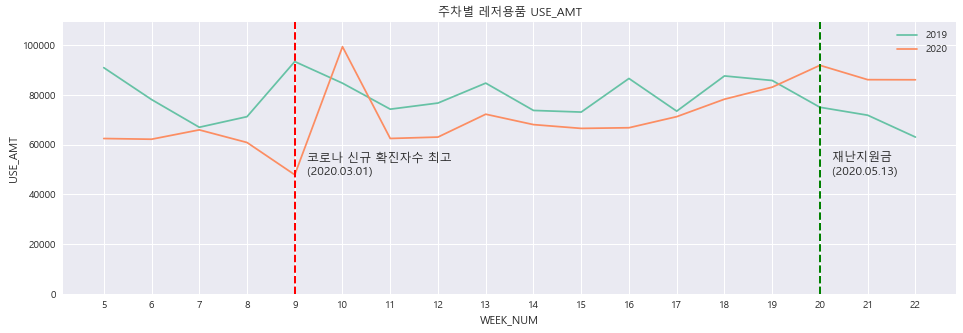

In [115]:
graph_by_weeknum(offline, "레저용품", "MCT_CAT_CD", "GU_CD", "DONG_CD", "USE_AMT")

# 본래는 8주차에서 9주차로 넘어가며 소비 급등하는데, 코로나로 소비 급감현상 나타났다.
# Q. 그런데 10주차에는 왜 갑자기 급증? -> 아래의 소비횟수는 그다지 증가하지 않았는데 AMT만 급증!
# 전반적으로 11주차부터 22주차까지 꾸준하게 성장하는 추세

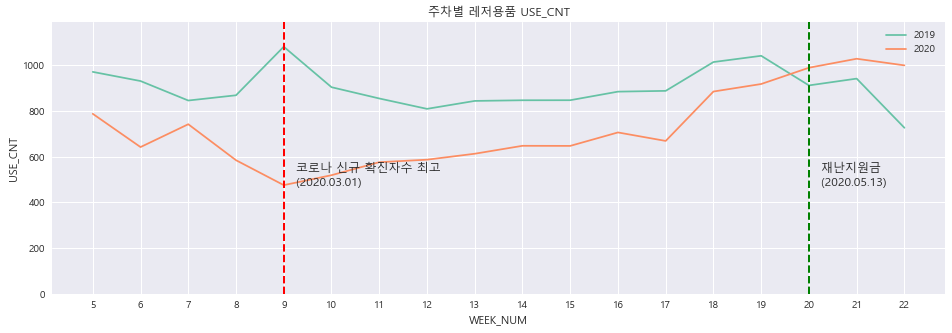

In [116]:
graph_by_weeknum(offline, "레저용품", "MCT_CAT_CD", "GU_CD", "DONG_CD", "USE_CNT")

# 코로나로 소비횟수 감소하다가, 
# 신규 확진자수 최고 찍고서는 꾸준히 소비횟수 증가하는 추세이다

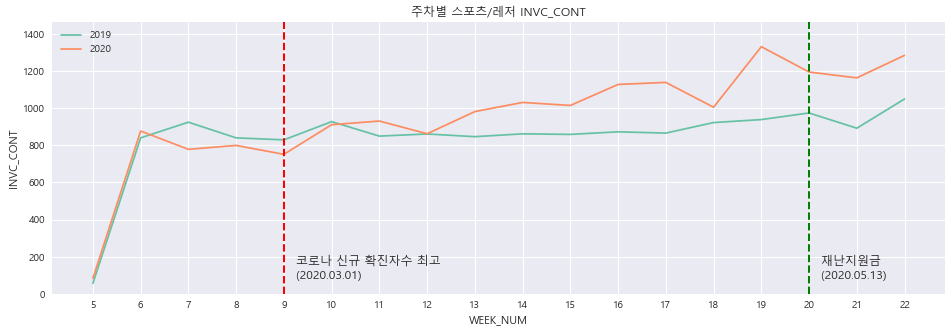

In [117]:
graph_by_weeknum(online, "스포츠/레저", "DL_GD_LCLS_NM", "CTGG_NM", "HDNG_NM", "INVC_CONT")

# 송장건수는 작년의 경우 9주차 이후 침체의 형태를 보이는 반면,
# 2020년에는 코로나 이후 꾸준하게 증가하는 추세를 보인다.

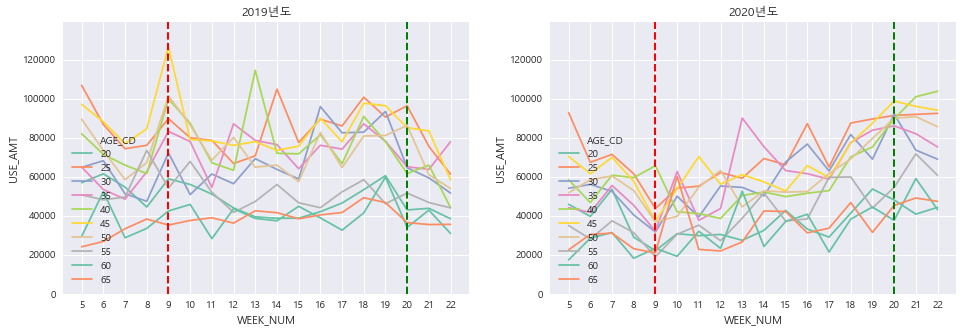

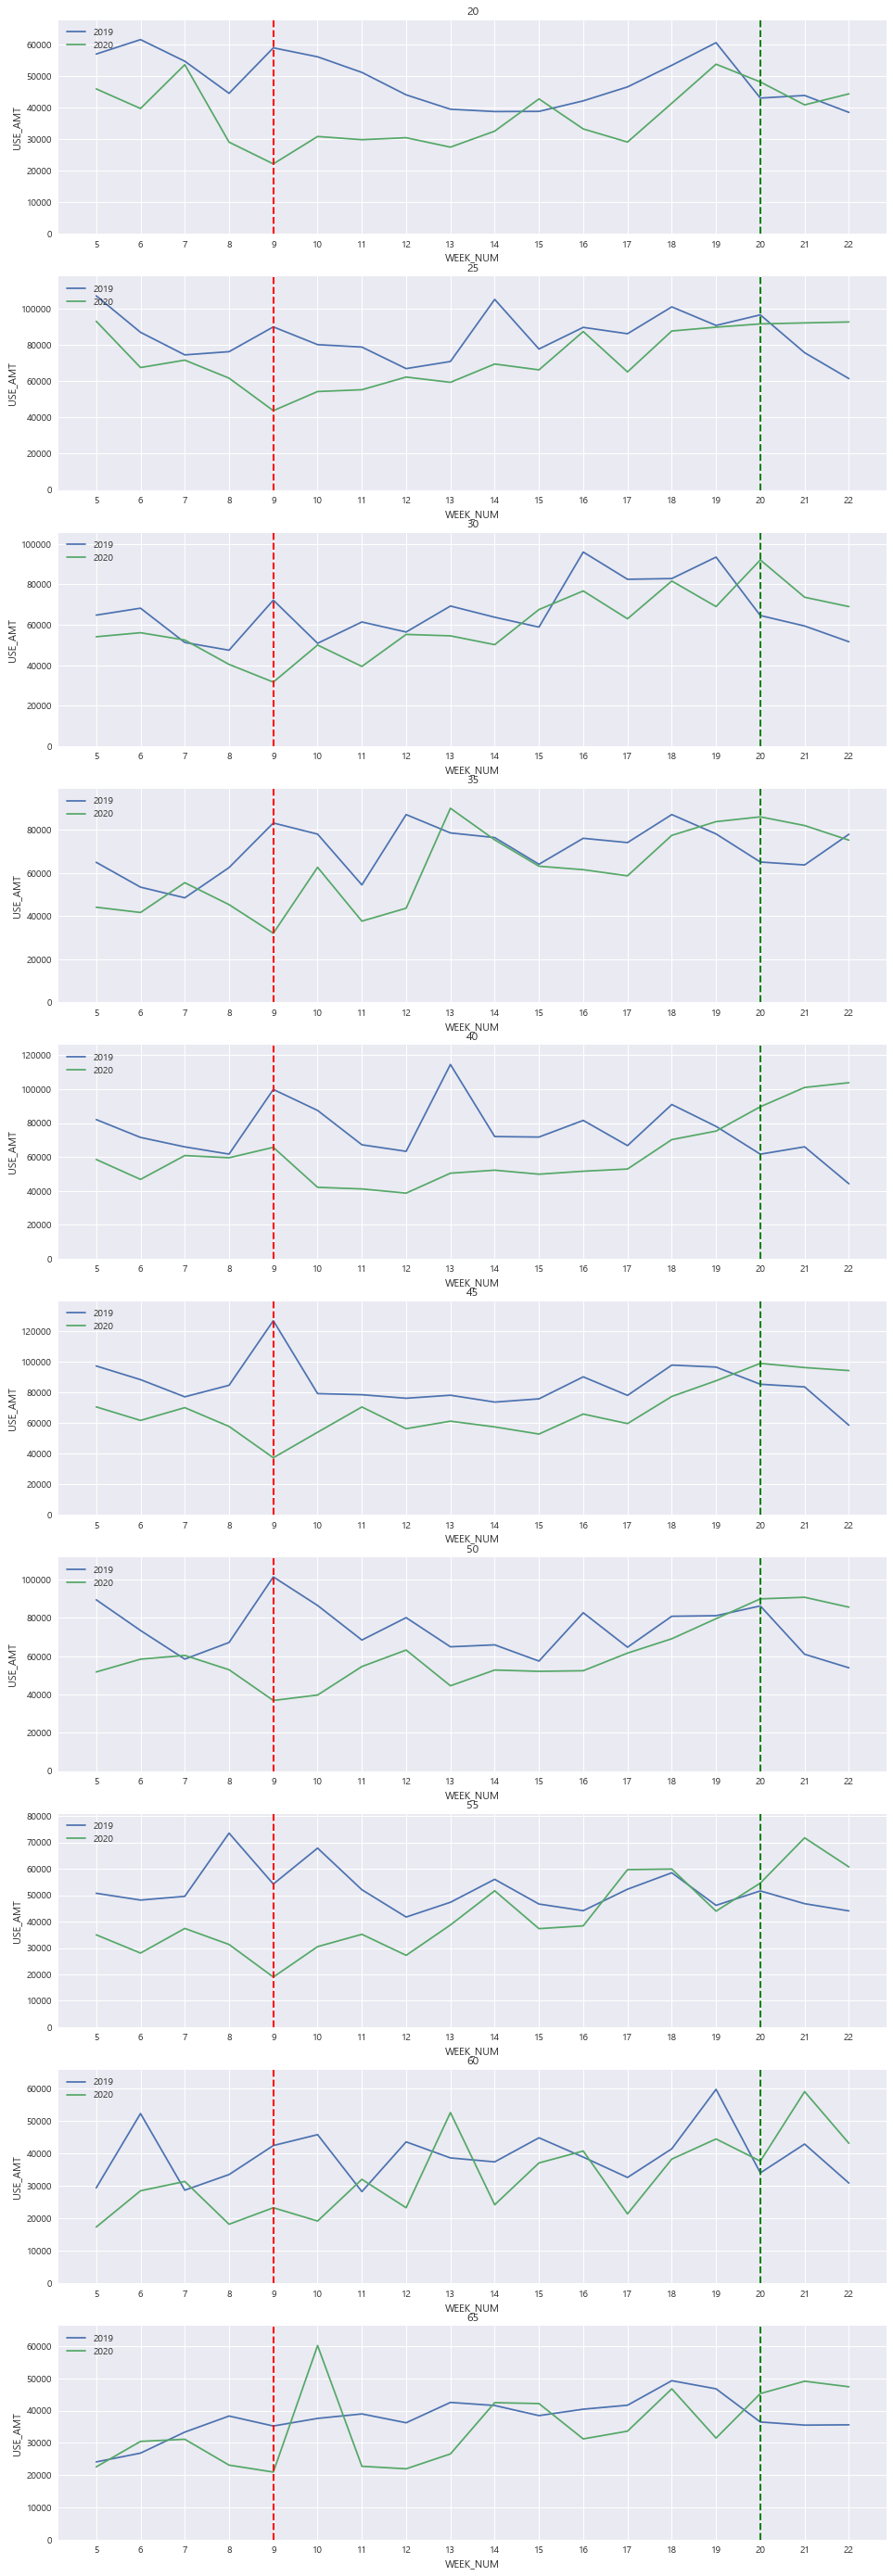

In [123]:
graph_by_weeknum_with_hue_offline(offline, "레저용품", "MCT_CAT_CD", "GU_CD", "DONG_CD", "USE_AMT", "AGE_CD")

# 연령대로 나누어 파악해보았다.
# 위에서 AMT가 9주차에서 10주차 넘어갈 때 급격히 뛴다고 했는데, 연령별 그래프 보니 65세 이상의 연령대에서 급격히 증가함을 파악!
# 거의 모든 연령대에서 코로나 피크 전까지는 소비 감소, 이후에는 꾸준히 증가하는 추세를 보인다.

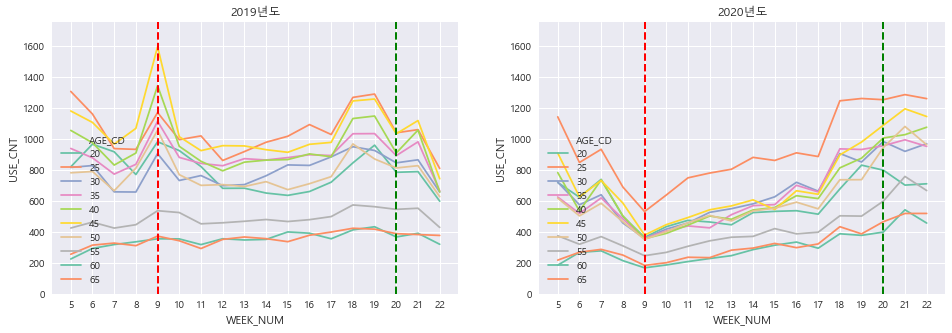

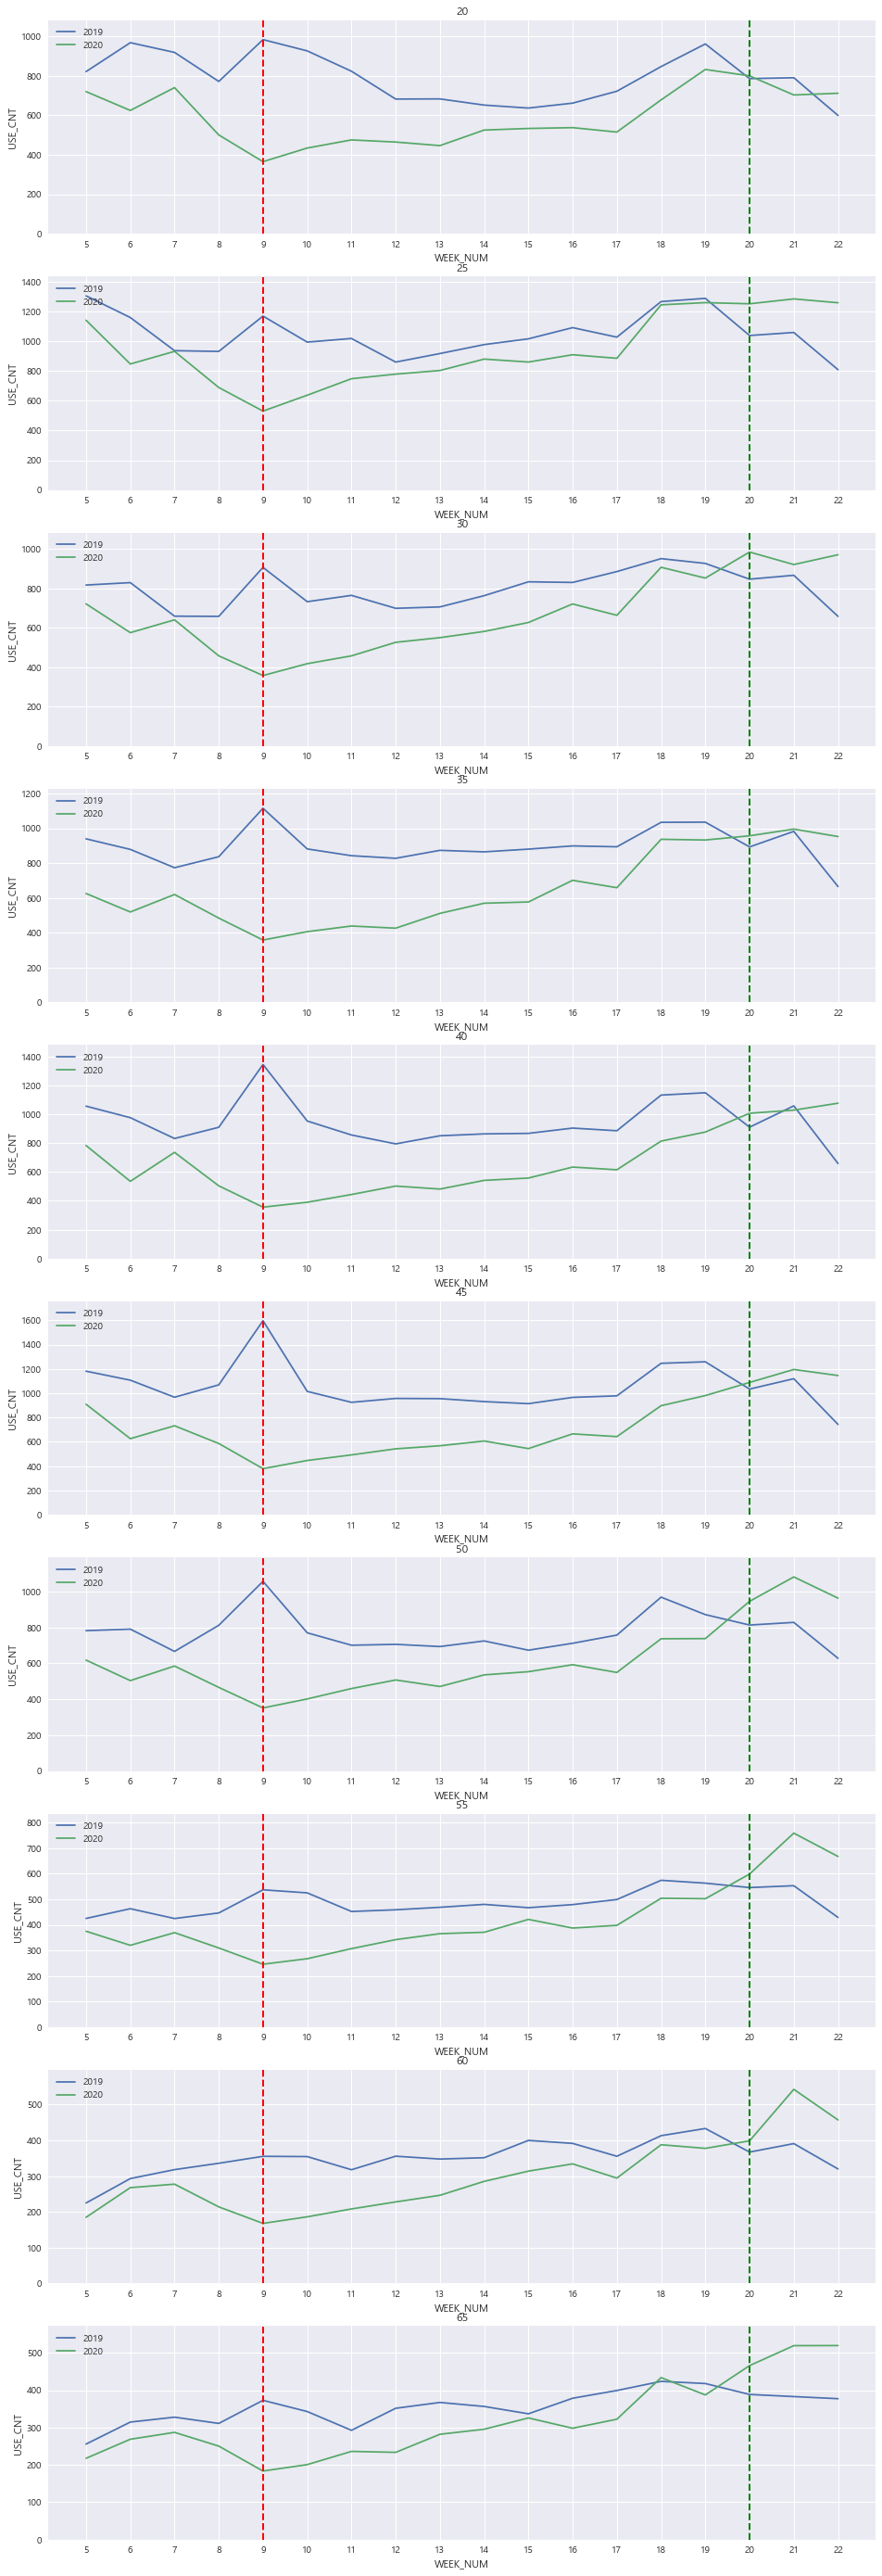

In [125]:
graph_by_weeknum_with_hue_offline(offline, "레저용품", "MCT_CAT_CD", "GU_CD", "DONG_CD", "USE_CNT", "AGE_CD")

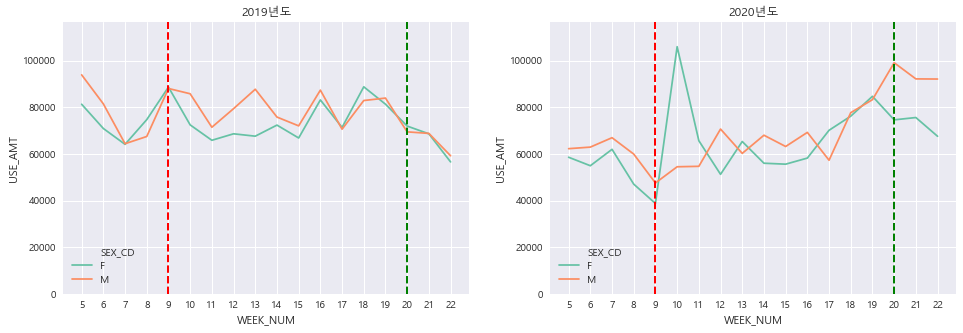

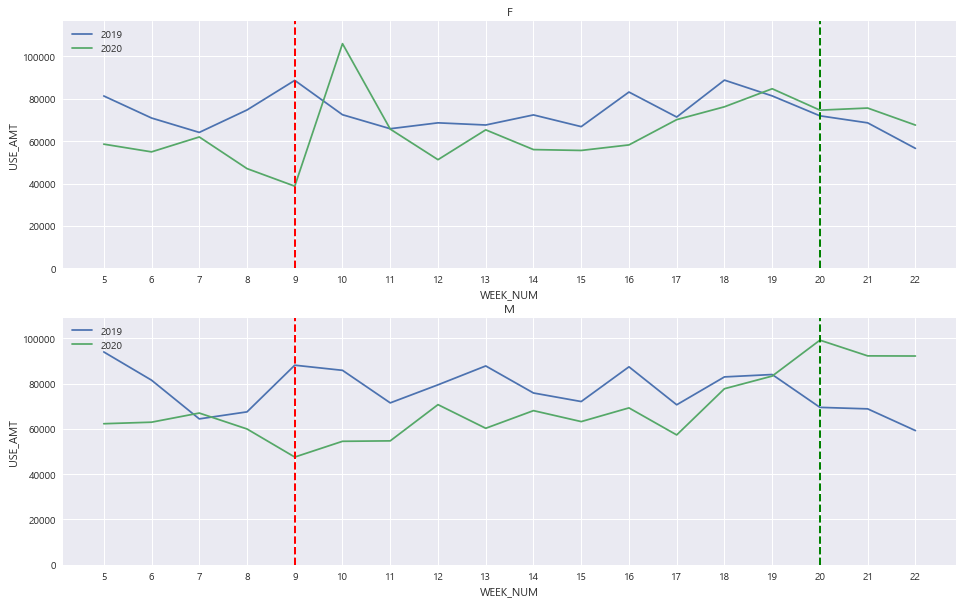

In [124]:
graph_by_weeknum_with_hue_offline(offline, "레저용품", "MCT_CAT_CD", "GU_CD", "DONG_CD", "USE_AMT", "SEX_CD")

# 2020년도 10주차 여성인 65세 이상의 노인층에서 어떠한 소비가 .. ?
# 전반적으로 코로나 이후 소비가 활성화되는 것이 보이며, 20주차에는 작년의 소비수준을 뛰어넘는다.
# 여성보다는 남성의 소비증가가 급격한 것으로 보인다.

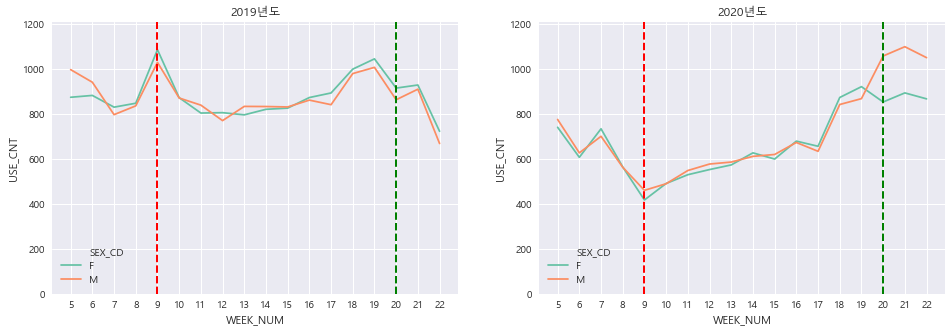

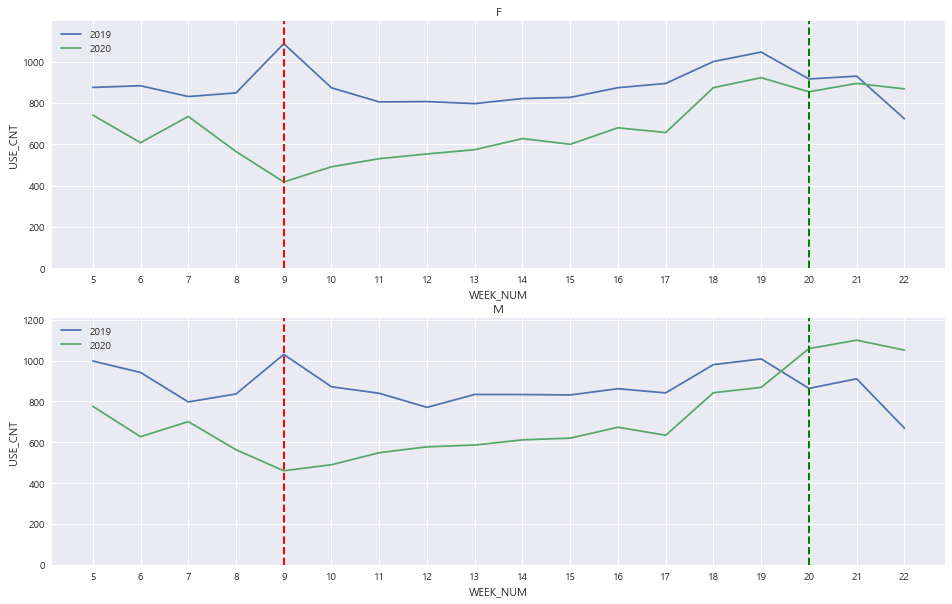

In [126]:
graph_by_weeknum_with_hue_offline(offline, "레저용품", "MCT_CAT_CD", "GU_CD", "DONG_CD", "USE_CNT", "SEX_CD")

---

## 6. 지역별

In [159]:
offline.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,AVG_AMT,YEAR,MONTH,DAY,YEAR_MONTH,WEEKDAY,WEEK_NUM
0,20190201,대구 중구,동인동,숙박,F,25,11,595,54.090909,2019,2,1,201902,4_금,5
1,20190201,대구 중구,동인동,숙박,F,50,5,243,48.600000,2019,2,1,201902,4_금,5
2,20190201,대구 중구,동인동,숙박,F,55,5,27,5.400000,2019,2,1,201902,4_금,5
3,20190201,대구 중구,동인동,숙박,M,20,11,243,22.090909,2019,2,1,201902,4_금,5
4,20190201,대구 중구,동인동,숙박,M,25,11,433,39.363636,2019,2,1,201902,4_금,5


## 7. 유동인구와의 관계

In [145]:
flow_201902 = pd.read_csv("data/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_201902.csv", sep='|')
flow_201903 = pd.read_csv("data/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_201903.csv", sep='|')
flow_201904 = pd.read_csv("data/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_201904.csv", sep='|')
flow_201905 = pd.read_csv("data/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_201905.csv", sep='|')
flow_202002 = pd.read_csv("data/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_202002.csv", sep='|')
flow_202003 = pd.read_csv("data/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_202003.csv", sep='|')
flow_202004 = pd.read_csv("data/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_202004.csv", sep='|')
flow_202005 = pd.read_csv("data/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_202005.csv", sep='|')
flow = pd.concat([flow_201902, flow_201903, flow_201904, flow_201905, flow_202002, flow_202003, flow_202004, flow_202005], axis=0)

In [147]:
flow['WEEK_NUM'] = flow['STD_YMD'].apply(lambda x:datetime.strptime(str(x), '%Y%m%d').isocalendar()[1])

In [148]:
# 카드소비 데이터와 연령 맞추기 위한 전처리
man_under_25 = ['MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509', 'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519', 'MAN_FLOW_POP_CNT_2024']
wman_under_25 = ['WMAN_FLOW_POP_CNT_0004', 'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014', 'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024']
man_over_65 = ['MAN_FLOW_POP_CNT_6569', 'MAN_FLOW_POP_CNT_70U']
wman_over_65 = ['WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP_CNT_70U']

flow['MAN_FLOW_POP_CNT_25L'] = flow[man_under_25].sum(axis=1)
flow['WMAN_FLOW_POP_CNT_25L'] = flow[wman_under_25].sum(axis=1)
flow['MAN_FLOW_POP_CNT_65U'] = flow[man_over_65].sum(axis=1)
flow['WMAN_FLOW_POP_CNT_65U'] = flow[wman_over_65].sum(axis=1)

flow.drop(man_under_25+wman_under_25+man_over_65+wman_over_65, axis=1, inplace=True)

In [155]:
groupby_columns = flow.drop(['STD_YM', 'STD_YMD', 'HDONG_CD', 'HDONG_NM', 'WEEK_NUM'], axis=1).columns.tolist()
flow = flow.groupby(['HDONG_NM', 'WEEK_NUM'])[groupby_columns].mean().reset_index()

In [156]:
flow

,HDONG_NM,WEEK_NUM,MAN_FLOW_POP_CNT_2529,MAN_FLOW_POP_CNT_3034,MAN_FLOW_POP_CNT_3539,MAN_FLOW_POP_CNT_4044,MAN_FLOW_POP_CNT_4549,MAN_FLOW_POP_CNT_5054,MAN_FLOW_POP_CNT_5559,MAN_FLOW_POP_CNT_6064,...,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,MAN_FLOW_POP_CNT_25L,WMAN_FLOW_POP_CNT_25L,MAN_FLOW_POP_CNT_65U,WMAN_FLOW_POP_CNT_65U
0,고산1동,5,4917.486000,4898.970000,6036.480000,6875.504000,9033.830000,9007.756000,7371.054000,5736.650000,...,5005.088000,6201.858000,7889.584000,6567.100000,5529.026000,3972.996000,9023.872000,8862.864000,6633.004000,4662.826000
1,고산1동,6,4614.930714,4489.228571,5809.669286,6559.168571,8341.452143,8547.892857,7016.172857,5738.494286,...,4915.667143,6101.703571,7780.983571,6476.805714,5453.615000,3948.988571,9156.272857,9144.480714,6881.459286,4856.617857
2,고산1동,7,4290.177143,4165.640714,5632.138571,6466.839286,8557.915714,8563.781429,7144.422143,5959.885000,...,4891.447857,6134.509286,7961.186429,6767.802143,5783.377143,4272.088571,8814.344286,8937.462143,7321.370000,5279.262143
3,고산1동,8,4168.724286,3965.967857,5308.987857,6183.268571,8073.535000,8251.254286,6896.790000,5620.262857,...,4527.910000,5668.452143,7409.971429,6352.567143,5385.138571,3867.209286,7766.291429,8062.474286,6743.667857,4719.149286
4,고산1동,9,3779.107857,3776.154286,5049.498571,5853.395000,7746.112143,7884.815000,6404.022857,5238.041429,...,4188.305000,5188.530714,6943.181429,5882.852143,4938.687857,3515.050714,7479.421429,7354.597143,6089.419286,4287.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,회현동,18,9631.319286,10779.061429,13250.890714,12394.335714,14634.607857,12825.189286,11718.460714,10995.367143,...,9971.147143,9378.022857,10200.570714,9381.009286,9480.928571,9328.454286,8638.436429,12463.060714,18281.577143,15151.611429
1238,회현동,19,9734.580000,10886.195000,13457.350000,12602.498571,14760.403571,13058.606429,11689.927143,11001.125000,...,9922.972143,9275.069286,9988.673571,9201.600000,9410.838571,9386.156429,8632.237143,12378.027857,18190.614286,15282.255714
1239,회현동,20,9735.889286,11452.832857,14684.665714,13905.791429,16326.507857,14139.957143,12427.411429,11479.107857,...,10368.965714,9645.355000,10445.254286,9352.087857,9447.999286,9179.690714,8241.333571,11761.337143,18649.550714,14834.384286
1240,회현동,21,9772.663571,11346.620714,14456.789286,13837.178571,16239.865000,14167.784286,12538.215714,11608.993571,...,10228.635000,9508.569286,10420.471429,9515.022857,9621.211429,9363.922857,8235.965000,11767.508571,18873.075714,15129.610714
